<a href="https://colab.research.google.com/github/halfChewedGum/python-practice/blob/main/MSCI700_finalproject_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from google.colab import files

uploaded = files.upload()

Saving cius2020_2022nov18_en.dta to cius2020_2022nov18_en.dta


Reading Data :

In [3]:
import io

df = pd.io.stata.read_stata(io.BytesIO(uploaded['cius2020_2022nov18_en.dta']))

In [4]:
df.head()

,pumfid,province,luc_rst,age_grp,gender,g_abm,lan_g01,emp,ed_g10,g_edu,...,wrpg991,wrpg992,wrpg993,wrpg994,wrpg995,wrpg996,wrpg997,wrpg998,wrpg999,wrpg1000
0,100000,11,03,06,1,2,1,2,2,2,...,58.74490,0.00000,91.23504,37.73533,84.68159,43.01466,0.00000,56.83786,103.81114,0.00000
1,100001,59,01,06,2,2,1,2,2,2,...,7136.75133,0.00000,0.00000,5224.34222,9012.71353,2402.81888,4359.56914,2818.29886,0.00000,4805.17223
2,100002,35,01,02,2,2,1,1,2,3,...,0.00000,0.00000,3391.39522,3810.10298,4368.93902,8221.13902,0.00000,0.00000,3462.35492,7660.63229
3,100003,35,01,03,2,2,1,1,2,3,...,6254.81170,6895.04808,4913.14578,5521.61592,0.00000,0.00000,0.00000,15612.81091,0.00000,6483.30541
4,100004,24,01,06,2,2,2,2,2,3,...,1477.61679,0.00000,1217.01163,2722.26852,3028.14230,0.00000,2702.80816,4168.62901,0.00000,0.00000


Make sure the categorical values are "Factors"

In [5]:
def factorize_els(el_list):
  codes, uniques = pd.factorize(el_list)



  return codes, uniques

The variables that need to be "factorized":


In [6]:
age_grp = [x for x in df['age_grp']]
emp = [x for x in df['emp']]
smphone = [x for x in df['dv_010a']]
laptop = [x for x in df['dv_010b']]
tablet = [x for x in df['dv_010c']]
pc = [x for x in df['dv_010d']]
have_smphone = [x for x in df['sm_g010a']]
time_morning = [x for x in df['sm_040b']]
time_tv = [x for x in df['sm_040c']]
communicate = [x for x in df['ts_020a']]
cred_card = [x for x in df['ec_080c']]
e_transfer = [x for x in df['ec_080e']]
online_shopper = [x for x in df['onl_shop']]
concern_sec = [x for x in df['sp_030a']]
physical_health = [x for x in df['gen_g01']]

In [7]:
age_grp = factorize_els(age_grp)[0]
emp = factorize_els(emp)[0]
smphone = factorize_els(smphone)[0]
laptop = factorize_els(laptop)[0]
tablet = factorize_els(tablet)[0]
pc = factorize_els(pc)[0]
have_smphone = factorize_els(have_smphone)[0]
time_morning = factorize_els(time_morning)[0]
time_tv =factorize_els(time_tv)[0]
communicate = factorize_els(communicate)[0]
cred_card = factorize_els(cred_card)[0]
e_transfer = factorize_els(e_transfer)[0]
online_shopper = factorize_els(online_shopper)[0]
concern_sec = factorize_els(concern_sec)[0]
physical_health = factorize_els(physical_health)[0]

In [8]:
#most important one : ui_050d

online_banking = [x for x in df['ui_050d']]
online_banking = factorize_els(online_banking)[0]
df['ui_050d'] = pd.Series(online_banking)

In [9]:
df['age_grp'] = pd.Series(age_grp)
df['emp'] = pd.Series(emp)
df['dv_010a']= pd.Series(smphone)
df['dv_010b']= pd.Series(laptop)
df['dv_010c']= pd.Series(tablet)
df['dv_010d']= pd.Series(pc)
df['sm_g010a']= pd.Series(have_smphone)
df['sm_040b']= pd.Series(time_morning)
df['sm_040c']= pd.Series(time_tv)
df['ts_020a']= pd.Series(communicate)
df['ec_080c']= pd.Series(cred_card)
df['ec_080e']= pd.Series(e_transfer)
df['onl_shop']= pd.Series(online_shopper)
df['sp_030a']= pd.Series(concern_sec)
df['gen_g01']= pd.Series(physical_health)

In [10]:
online_purchases = df['ec_g010x']
services_online = df['ec_g060a']
sum_spending = df['sum_gtot']

In [11]:
features = ['ui_050d','ec_g010x', 'ec_g060a', 'sum_gtot', 'age_grp', 'emp',
            'dv_010a' , 'dv_010b' , 'dv_010c' , 'dv_010d', 'sm_g010a',
            'sm_040b' , 'sm_040c' , 'ts_020a' , 'ec_080c', 'ec_080e',
            'onl_shop', 'sp_030a' , 'gen_g01']

independent = ['ec_g010x', 'ec_g060a', 'sum_gtot', 'age_grp', 'emp',
            'dv_010a' , 'dv_010b' , 'dv_010c' , 'dv_010d', 'sm_g010a',
            'sm_040b' , 'sm_040c' , 'ts_020a' , 'ec_080c', 'ec_080e',
            'onl_shop', 'sp_030a' , 'gen_g01']

to_scale = ['ec_g010x', 'ec_g060a', 'sum_gtot']

In [12]:
len(independent)

18

In [13]:
small_df = df[features]

small_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17409 entries, 0 to 17408
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ui_050d   17409 non-null  int64
 1   ec_g010x  17409 non-null  int32
 2   ec_g060a  17409 non-null  int32
 3   sum_gtot  17409 non-null  int32
 4   age_grp   17409 non-null  int64
 5   emp       17409 non-null  int64
 6   dv_010a   17409 non-null  int64
 7   dv_010b   17409 non-null  int64
 8   dv_010c   17409 non-null  int64
 9   dv_010d   17409 non-null  int64
 10  sm_g010a  17409 non-null  int64
 11  sm_040b   17409 non-null  int64
 12  sm_040c   17409 non-null  int64
 13  ts_020a   17409 non-null  int64
 14  ec_080c   17409 non-null  int64
 15  ec_080e   17409 non-null  int64
 16  onl_shop  17409 non-null  int64
 17  sp_030a   17409 non-null  int64
 18  gen_g01   17409 non-null  int64
dtypes: int32(3), int64(16)
memory usage: 2.5 MB


In [14]:
X = small_df[independent]
y = small_df['ui_050d']

In [15]:
from sklearn.preprocessing import StandardScaler

def norm_predictors(x):
  """ Takes in a dataframe X and returns a normalized version using StandardScaler"""
  cols = list(x.columns)
  x = np.array(x)
  sc = StandardScaler()
  x_scale = sc.fit_transform(x)
  df = pd.DataFrame(x_scale, columns = cols)

  return df

In [16]:
norm_df = norm_predictors(small_df[to_scale])

In [17]:
X['ec_g010x'] = pd.Series(norm_df['ec_g010x'])
X['ec_g060a'] = pd.Series(norm_df['ec_g060a'])
X['sum_gtot'] = pd.Series(norm_df['sum_gtot'])

<ipython-input-17-7779a6f4790b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ec_g010x'] = pd.Series(norm_df['ec_g010x'])
<ipython-input-17-7779a6f4790b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ec_g060a'] = pd.Series(norm_df['ec_g060a'])
<ipython-input-17-7779a6f4790b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [18]:
type_1 = X[['ec_g010x', 'ec_g060a', 'sum_gtot']]
type_2 = X[['age_grp', 'emp','dv_010a' , 'dv_010b' , 'dv_010c' , 'dv_010d', 'sm_g010a',
            'sm_040b' , 'sm_040c' , 'ts_020a' , 'ec_080c', 'ec_080e',
            'onl_shop', 'sp_030a' , 'gen_g01']]

In [19]:
type_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17409 entries, 0 to 17408
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ec_g010x  17409 non-null  float64
 1   ec_g060a  17409 non-null  float64
 2   sum_gtot  17409 non-null  float64
dtypes: float64(3)
memory usage: 544.0 KB


In [20]:
type_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17409 entries, 0 to 17408
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age_grp   17409 non-null  int64
 1   emp       17409 non-null  int64
 2   dv_010a   17409 non-null  int64
 3   dv_010b   17409 non-null  int64
 4   dv_010c   17409 non-null  int64
 5   dv_010d   17409 non-null  int64
 6   sm_g010a  17409 non-null  int64
 7   sm_040b   17409 non-null  int64
 8   sm_040c   17409 non-null  int64
 9   ts_020a   17409 non-null  int64
 10  ec_080c   17409 non-null  int64
 11  ec_080e   17409 non-null  int64
 12  onl_shop  17409 non-null  int64
 13  sp_030a   17409 non-null  int64
 14  gen_g01   17409 non-null  int64
dtypes: int64(15)
memory usage: 2.1 MB


In [21]:
cols = X.select_dtypes(include = ['object'])

for col in cols.columns.values:
  df[col] = df[col].fillna('')

In [22]:
X.fillna(value = '', inplace = True)

<ipython-input-22-c0b19f9bcee9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(value = '', inplace = True)


In [23]:
type_dict = {
    'emp': 'object',
    'dv_010a': 'object',
    'dv_010b': 'object',
    'dv_010c': 'object',
    'dv_010d': 'object',
    'sm_g010a': 'object',
    'sm_040b': 'object',
    'sm_040c': 'object',
    'ts_020a': 'object',
    'ec_080c': 'object',
    'ec_080e': 'object',
    'onl_shop': 'object',
    'sp_030a': 'object',
    'gen_g01': 'object'
}

x = X.astype(type_dict)
y = y.astype('object')

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [25]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17409 entries, 0 to 17408
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ec_g010x  17409 non-null  float64
 1   ec_g060a  17409 non-null  float64
 2   sum_gtot  17409 non-null  float64
 3   age_grp   17409 non-null  int64  
 4   emp       17409 non-null  object 
 5   dv_010a   17409 non-null  object 
 6   dv_010b   17409 non-null  object 
 7   dv_010c   17409 non-null  object 
 8   dv_010d   17409 non-null  object 
 9   sm_g010a  17409 non-null  object 
 10  sm_040b   17409 non-null  object 
 11  sm_040c   17409 non-null  object 
 12  ts_020a   17409 non-null  object 
 13  ec_080c   17409 non-null  object 
 14  ec_080e   17409 non-null  object 
 15  onl_shop  17409 non-null  object 
 16  sp_030a   17409 non-null  object 
 17  gen_g01   17409 non-null  object 
dtypes: float64(3), int64(1), object(14)
memory usage: 2.5+ MB


In [26]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 17409 entries, 0 to 17408
Series name: ui_050d
Non-Null Count  Dtype 
--------------  ----- 
17409 non-null  object
dtypes: object(1)
memory usage: 272.0+ KB


Some are categorical, some are continous: Two types of inputs.

In [27]:
input_cont = tf.keras.Input(shape = (3,))
input_cate = tf.keras.Input(shape = (15,))

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate

In [29]:
def create_nn(dim):
  model = Sequential()
  model.add(Dense(64, input_dim = dim, activation = 'relu'))
  model.add(Dense(32, activation = 'relu'))

  return model

In [30]:
def create_nn2(dim):
  model = Sequential()
  model.add(Dense(128, input_dim = dim, activation = 'relu'))
  model.add(Dense(256, activation = 'relu'))

  return model

In [31]:
input_1 = x_train[['ec_g010x', 'ec_g060a', 'sum_gtot']]
input_2 = x_train[['age_grp', 'emp','dv_010a' , 'dv_010b' , 'dv_010c' , 'dv_010d', 'sm_g010a',
            'sm_040b' , 'sm_040c' , 'ts_020a' , 'ec_080c', 'ec_080e',
            'onl_shop', 'sp_030a' , 'gen_g01']]

input_1.shape

(13927, 3)

In [32]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(type_1, y, test_size = 0.2, random_state = 2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(type_2, y, test_size = 0.2, random_state = 3)

In [33]:
nn1 = create_nn(input_1.shape[1])
nn2 = create_nn2(input_2.shape[1])

In [34]:
nn1_1 = create_nn(x_train1.shape[1])
nn2_1 = create_nn2(x_train2.shape[1])

In [35]:
combined = concatenate([nn1.output, nn2.output])
combined2 = concatenate([nn1_1.output, nn2_1.output])

In [36]:
o = Dense(4, activation = 'relu')(combined)
o = Dense(1, activation = 'relu')(o)

o1 = Dense(4, activation = 'relu')(combined2)
o1 = Dense(1, activation = 'relu')(o1)

In [37]:
model_final = Model(inputs = [nn1.input, nn2.input], outputs = o)
model_2 = Model(inputs = [nn1_1.input, nn2_1.input], outputs = o1)

In [ ]:
"""
branch1 =
branch1 = D
branch1 = Model(inputs = input_cont, outputs = branch1)

branch2 =
branch2 = (branch2)
branch2 = Model(inputs = input_cate, outputs = branch2)

combined = concatenate([branch1.output, branch2.output])

z = Dense(2, activation = 'relu')(combined)
z = Dense(1, activation = 'linear')(z)


model = Model(inputs = [branch1.input, branch2.input], outputs = z)
"""

In [38]:
optimizer = Adam(learning_rate = 0.01)

model_final.compile(loss = 'mean_absolute_percentage_error', optimizer = optimizer)
model_2.compile(loss = 'mean_absolute_percentage_error', optimizer = optimizer)

In [39]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13927 entries, 1504 to 235
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ec_g010x  13927 non-null  float64
 1   ec_g060a  13927 non-null  float64
 2   sum_gtot  13927 non-null  float64
 3   age_grp   13927 non-null  int64  
 4   emp       13927 non-null  object 
 5   dv_010a   13927 non-null  object 
 6   dv_010b   13927 non-null  object 
 7   dv_010c   13927 non-null  object 
 8   dv_010d   13927 non-null  object 
 9   sm_g010a  13927 non-null  object 
 10  sm_040b   13927 non-null  object 
 11  sm_040c   13927 non-null  object 
 12  ts_020a   13927 non-null  object 
 13  ec_080c   13927 non-null  object 
 14  ec_080e   13927 non-null  object 
 15  onl_shop  13927 non-null  object 
 16  sp_030a   13927 non-null  object 
 17  gen_g01   13927 non-null  object 
dtypes: float64(3), int64(1), object(14)
memory usage: 2.0+ MB


In [42]:
model_2.fit(
    x = [x_train1, x_train2],
    y = y_train1,
    epochs = 50,
    verbose = 0
)

ValueError: ignored

In [43]:
preds = model_2.predict([x_test1, x_test2])

109/109 [==============================] - 0s 2ms/step


In [44]:
type(preds)

numpy.ndarray

In [45]:
diff = preds.flatten() - y_test1
percentDiff = (diff / y_test1) *100
abspercent = np.abs(percentDiff)

ZeroDivisionError: ignored

In [46]:
mean = np.mean(abspercent)
std = np.std(abspercent)

print("mean difference: {}, std: {}".format(mean, std))

NameError: ignored

In [47]:
%pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 7.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=57328969ddfee48acb54bdba53825d880418078f98b065f7904efc84045cc095
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [48]:
%pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.2 MB/s eta 0:00:00


In [49]:
import lifelines
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [50]:
evals = model_2.evaluate(x = [x_test1, x_test2], y = y_test1)
evals

ValueError: ignored

In [62]:
from sklearn.metrics import mean_absolute_percentage_error

In [242]:
mean_absolute_percentage_error(preds, y_test1)

1969839814039421.5

In [243]:
mean_squared_error(preds, y_test1)

0.7630672027570362

In [244]:
r2_score(preds, y_test1)

0.0

In [245]:
def f_wrapper(x):
  return model_2.predict(x).flatten()


In [51]:
x_train_1summary = shap.kmeans(x_train1, 200)
x_train_2summary = shap.kmeans(x_train2, 200)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


In [52]:
small_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17409 entries, 0 to 17408
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ui_050d   17409 non-null  int64
 1   ec_g010x  17409 non-null  int32
 2   ec_g060a  17409 non-null  int32
 3   sum_gtot  17409 non-null  int32
 4   age_grp   17409 non-null  int64
 5   emp       17409 non-null  int64
 6   dv_010a   17409 non-null  int64
 7   dv_010b   17409 non-null  int64
 8   dv_010c   17409 non-null  int64
 9   dv_010d   17409 non-null  int64
 10  sm_g010a  17409 non-null  int64
 11  sm_040b   17409 non-null  int64
 12  sm_040c   17409 non-null  int64
 13  ts_020a   17409 non-null  int64
 14  ec_080c   17409 non-null  int64
 15  ec_080e   17409 non-null  int64
 16  onl_shop  17409 non-null  int64
 17  sp_030a   17409 non-null  int64
 18  gen_g01   17409 non-null  int64
dtypes: int32(3), int64(16)
memory usage: 2.5 MB


In [53]:
sdf = small_df.astype('float64')

In [54]:
sm_ = Sequential()
sm_.add(Dense(128, activation = 'relu'))
sm_.add(Dense(64, activation = 'relu'))
sm_.add(Dense(1))


opt = Adam(learning_rate = 0.001)

sm_.compile(loss = 'mse', optimizer = opt)

In [55]:
X = X.astype('float64')
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17409 entries, 0 to 17408
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ec_g010x  17409 non-null  float64
 1   ec_g060a  17409 non-null  float64
 2   sum_gtot  17409 non-null  float64
 3   age_grp   17409 non-null  float64
 4   emp       17409 non-null  float64
 5   dv_010a   17409 non-null  float64
 6   dv_010b   17409 non-null  float64
 7   dv_010c   17409 non-null  float64
 8   dv_010d   17409 non-null  float64
 9   sm_g010a  17409 non-null  float64
 10  sm_040b   17409 non-null  float64
 11  sm_040c   17409 non-null  float64
 12  ts_020a   17409 non-null  float64
 13  ec_080c   17409 non-null  float64
 14  ec_080e   17409 non-null  float64
 15  onl_shop  17409 non-null  float64
 16  sp_030a   17409 non-null  float64
 17  gen_g01   17409 non-null  float64
dtypes: float64(18)
memory usage: 2.5 MB


In [56]:

y = y.astype('float64')

In [57]:
xtr, xte, ytr, yte = train_test_split(X, y, test_size = 0.2, random_state = 90)

In [58]:
h = sm_.fit(
    xtr, ytr, epochs = 100, verbose = 0
)

In [59]:
ev = sm_.evaluate(xte, yte)

109/109 [==============================] - 0s 2ms/step - loss: 0.2398


In [60]:
y_p = sm_.predict(xte)
mse_ = mean_squared_error(y_p, yte)

mse_

109/109 [==============================] - 0s 2ms/step


0.23975231444537573

In [63]:
mean_absolute_percentage_error(y_p, yte)

4.0358237837893

In [65]:
r2_ = r2_score(y_p, yte)
r2_

0.516441051264027

In [66]:
hist = pd.DataFrame(h.history)
hist['epoch'] = h.epoch
hist.tail()

,loss,epoch
95,0.088962,95
96,0.089247,96
97,0.087755,97
98,0.087465,98
99,0.086510,99


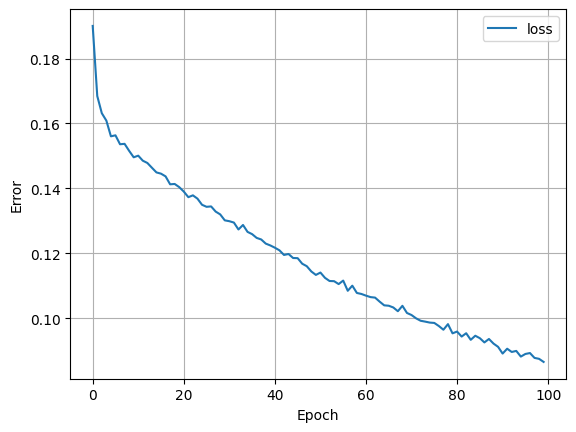

In [67]:
def plot_loss(history):
  plt.plot(h.history['loss'], label='loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(h)

In [68]:
import shap

In [69]:
xtr_sam = shap.sample(xtr, 100)
e = shap.KernelExplainer(sm_, xtr_sam)

In [70]:
shap_vs = e.shap_values(xtr_sam)

  0%|          | 0/100 [00:00<?, ?it/s]

Explain's the first prediction:

In [72]:
features.remove('ui_050d')

In [73]:
shap.initjs()
shap.force_plot(e.expected_value[0], shap_vs[0][0], features = features)

In [74]:
features

['ec_g010x',
 'ec_g060a',
 'sum_gtot',
 'age_grp',
 'emp',
 'dv_010a',
 'dv_010b',
 'dv_010c',
 'dv_010d',
 'sm_g010a',
 'sm_040b',
 'sm_040c',
 'ts_020a',
 'ec_080c',
 'ec_080e',
 'onl_shop',
 'sp_030a',
 'gen_g01']

In [75]:
xte_s = shap.sample(xte, 100)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


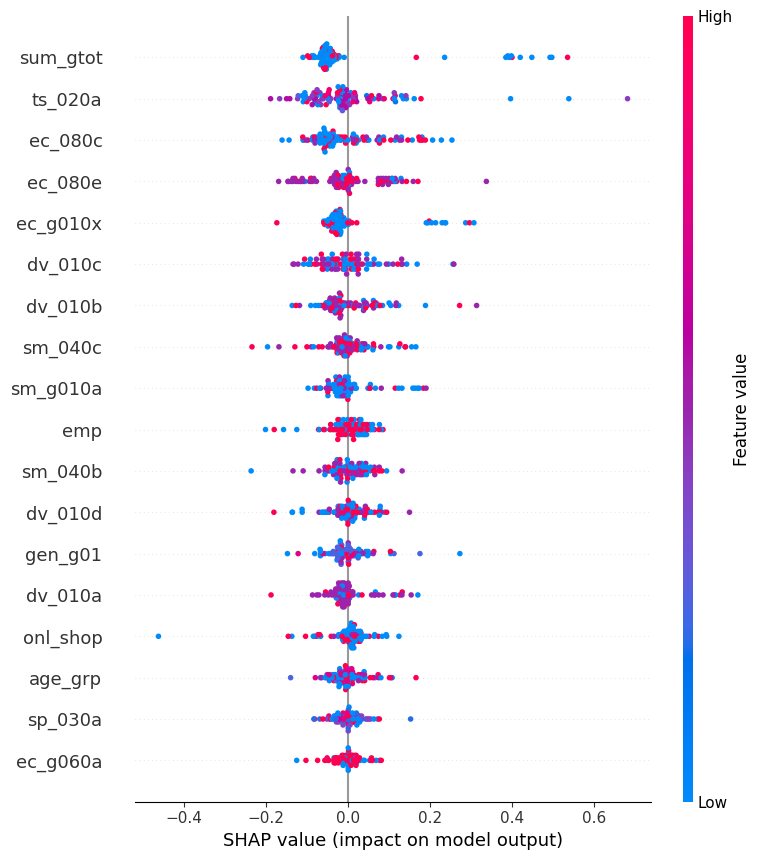

In [76]:
shap.summary_plot(shap_vs[0], xte_s, feature_names = features)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


1/1 [==============================] - 0s 20ms/step


  0%|          | 0/200 [00:00<?, ?it/s]

1302/1302 [==============================] - 2s 2ms/step


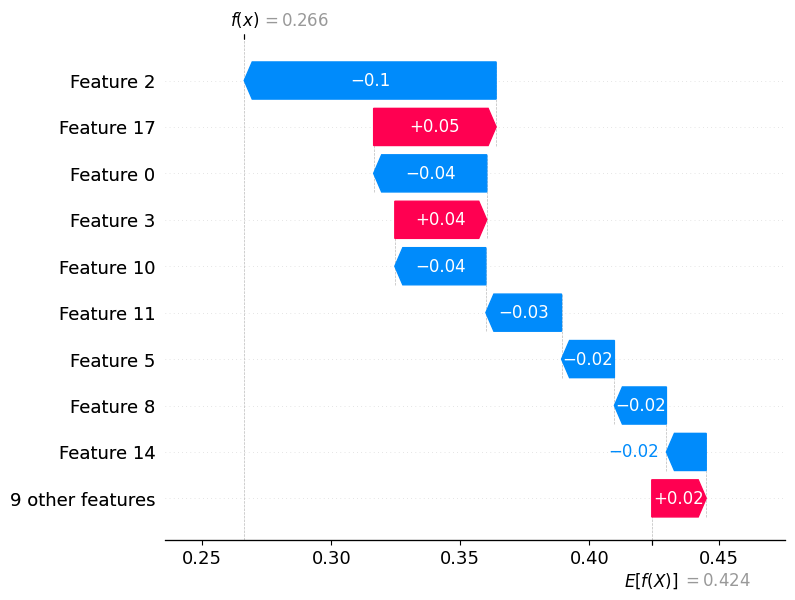

In [78]:
def f_wrapper(X):

    return sm_.predict(X).flatten()

df_tr = pd.DataFrame(xtr)
x_tr_sum = shap.kmeans(xtr, 20)

# Compute Shap values
e2 = shap.KernelExplainer(f_wrapper, x_tr_sum)
xtr_sample = xtr.sample(200)
shap_vs2  = e2.shap_values(xtr_sample)


shap.plots._waterfall.waterfall_legacy(e2.expected_value, shap_vs2[0])

In [79]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 8.0 MB/s eta 0:00:00


In [81]:
%pip install ann_visualizer

  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=ed408d3a9b1c7c7d3b2272f7b95798060a51aabe104f25cdc4eea65deaa7fd4e
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [82]:
import visualkeras
from ann_visualizer.visualize import ann_viz

ann_viz(sm_, title="Neural Network")